# Objective

In this section I will analyze the dataset to answer the following questions:
1. what's the average of credit card number each customer has among credit scores?
2. how's the relation of monthly balance vs annual income by credt scores?
3. what's the distribution of average total EMI per month across credit scores?
4. what's the distribution of average credit_history_age among credit scores?
5. what's the distribution of average number of credit inquiries among credit scores?
6. what's the distribution of average outstanding_debt among credit scores?
7. what's the distribution of average monthly_balance among credit scores?

In [1]:
from os.path import join as path_join

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import const
import phik

# Data Loading

In [2]:
df_clean = pd.read_csv(path_join(const.DS_DIR_PATH, "data_clean.csv"))

In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       94175 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         99979 non-null   float64
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               91339 non-null   float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    90276 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Outstanding_Debt          100000 non-null  fl

# EDA

# AVG of Credit Card Number among Credit Scores

In [4]:
avg_num_loan_by_cred_score = df_clean[[
    "Num_of_Loan", 
     "Credit_Score"
]].groupby("Credit_Score").agg({
    "Num_of_Loan": "mean"
}).rename(columns={
    "Num_of_Loan": "AVG_Num_of_Loan"
}).reset_index().sort_values(by="AVG_Num_of_Loan", ascending=False)

avg_num_loan_by_cred_score

,Credit_Score,AVG_Num_of_Loan
1,Poor,7.881776
2,Standard,7.049311
0,Good,6.212708


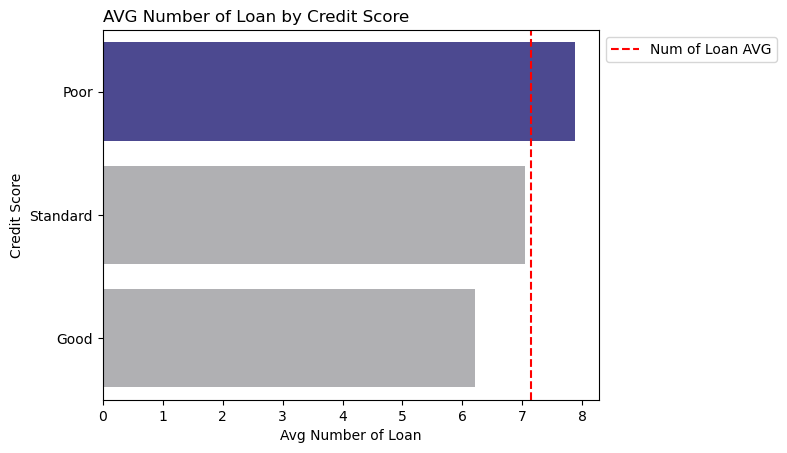

In [5]:
sns.barplot(
	data=avg_num_loan_by_cred_score,
	x="AVG_Num_of_Loan",
	y="Credit_Score",
	errorbar=None,
    palette=["#413d9c", "#afafb3", "#afafb3"],
    hue="Credit_Score"
)

plt.axvline(
    x=df_clean["Num_of_Loan"].mean(),
    linestyle="--",
    color="red",
    label="Num of Loan AVG"
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

plt.title("AVG Number of Loan by Credit Score", loc="left")
plt.xlabel("Avg Number of Loan")
plt.ylabel("Credit Score")
plt.show()

- `Customers with poor credit scores have a slightly higher number of credit cards on average`, but the difference compared to those with standard and good credit scores is `not significant`.
- `It's indicating that there's no association between number of credit card and credit score.`

## Relation of Monthly Balance vs Annual Income by Credit Scores

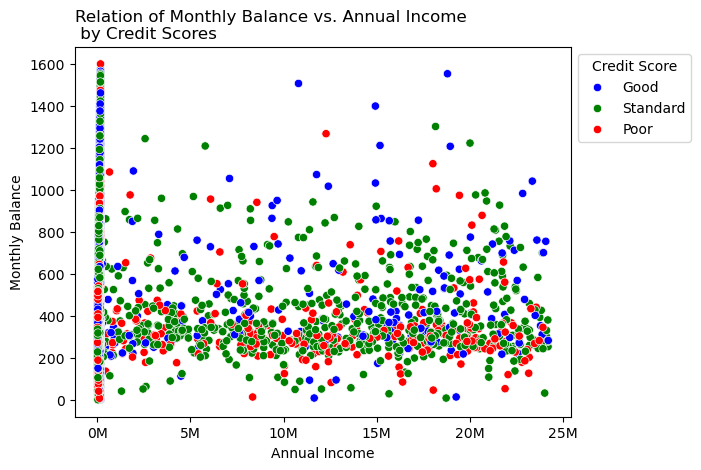

In [6]:
sns.scatterplot(
	data=df_clean,
	x="Annual_Income",
	y="Monthly_Balance",
	hue="Credit_Score",
    palette=["blue", "green", "red"]
)

plt.title("Relation of Monthly Balance vs. Annual Income\n by Credit Scores", loc="left")
plt.ylabel("Monthly Balance")
plt.xlabel("Annual Income")
plt.legend(
    title="Credit Score", 
    loc='upper left', 
    bbox_to_anchor=(1, 1)
)

# format x axis label to use numbering in millions
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(
        lambda x, _: f'{x * 1e-6:.0f}M'
    )
)

plt.show()

- Data points that groupped by credit scores are not forming any trend.
- This conclude that there's no relation among monthly balance, annual income, and credit score

## Variables that have significant correlation with credit score

/Users/liarta/miniconda3/envs/main/lib/python3.9/site-packages/phik/phik.py:128: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


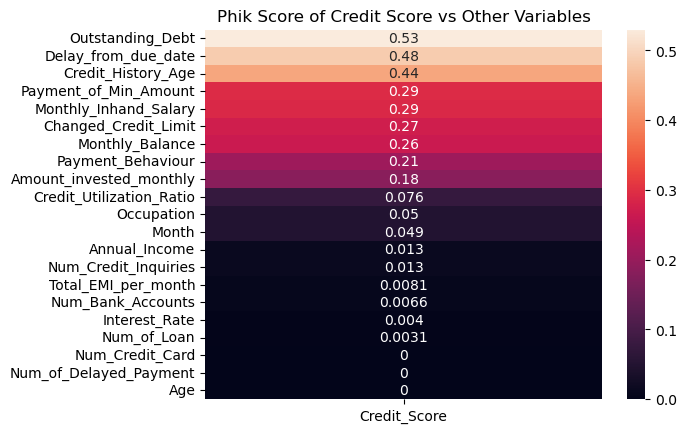

In [7]:
sns.heatmap(
    df_clean.phik_matrix(
        interval_cols=list(
            df_clean.select_dtypes(include=["int", "float"]).columns
        )
    )[["Credit_Score"]].sort_values(by="Credit_Score", ascending=False).drop(index=["Credit_Score"]),
    annot=True
)

plt.title("Phik Score of Credit Score vs Other Variables")
plt.show()

- Phik method shows that Outstanding Debt, Delay from due date, and credit history age are variables with high correlation score with credit score

## How are variables with strong correlation with credit score affect it?

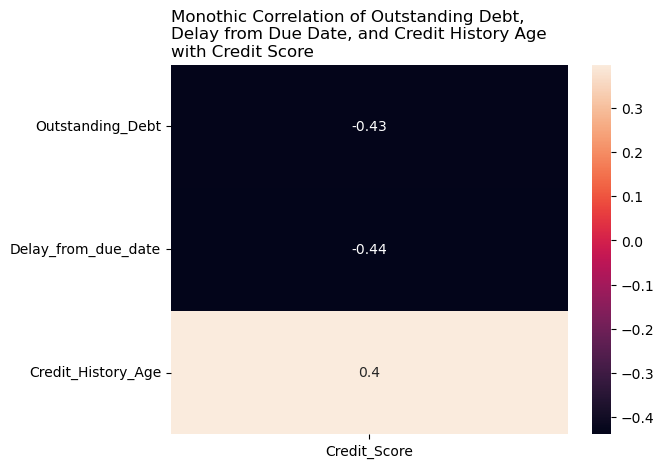

In [8]:
sns.heatmap(
    pd.concat([
        df_clean["Credit_Score"].apply(lambda cs: 0 if(cs=="Poor") else 1 if(cs=="Standard") else 2).to_frame(),
        df_clean[["Outstanding_Debt", "Delay_from_due_date", "Credit_History_Age"]]
    ], axis=1).corr(method="spearman")[["Credit_Score"]].drop(index=["Credit_Score"]),
    annot=True
)

plt.title("Monothic Correlation of Outstanding Debt,\nDelay from Due Date, and Credit History Age\nwith Credit Score", loc="left")
plt.show()

- As the outsanding debt and delay from due date increases, the credit scores decreases. Implying customer with high outstanding debt and/or delay from due date will have low credit score
- As the credit card go older, the credit score increases. This might happen because they become a loyal customer and able to manage their credit score. Consequently, they can utilize the credit card for their own benefit.

In [9]:
credit_score_prop = df_clean["Credit_Score"].value_counts(normalize=True).round(2)
credit_score_prop

Credit_Score
Standard    0.53
Poor        0.29
Good        0.18
Name: proportion, dtype: float64

## Credit Score Proportion

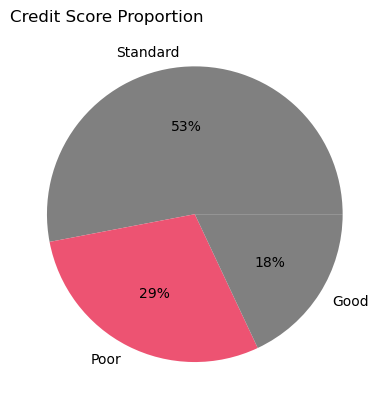

In [10]:
plt.pie(
    credit_score_prop,
    labels=credit_score_prop.index,
    autopct="%i%%",
    colors=["grey", "#ed5372", "grey"]
)

plt.title("Credit Score Proportion", loc="left")
plt.show()

- There are 29% of poor credit scores in the dataset.
- It's a decent number and might increase the number of non-performing loan, which can leads to increasing the bank's financial risk.

## Distribution of Age

<Axes: xlabel='Age'>

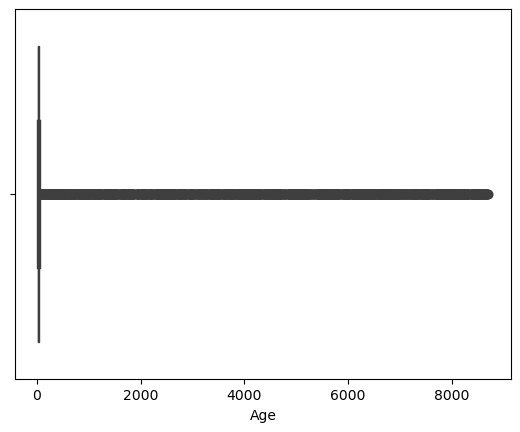

In [11]:
sns.boxplot(
    data=df_clean,
    x="Age"
)

In [12]:
df_clean["Age"].describe()

count    94175.000000
mean       116.682187
std        690.079845
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

- The dataset contains age ranging from 14 to 8,698 years.
- The distribution clearly doesn't make sense.
- I will assume these outliers data are appear due to system faliure

### Distribution of Age below 70 by Credit Score

This [reference](https://www.linkedin.com/posts/phillipcantrell_a-study-found-that-the-most-productive-age-activity-7157562857289601024-gqrJ/) stated that, the most productive age period is 60-70 y.o. Thus, I will analyze the distribution of customer age below 70 y.o

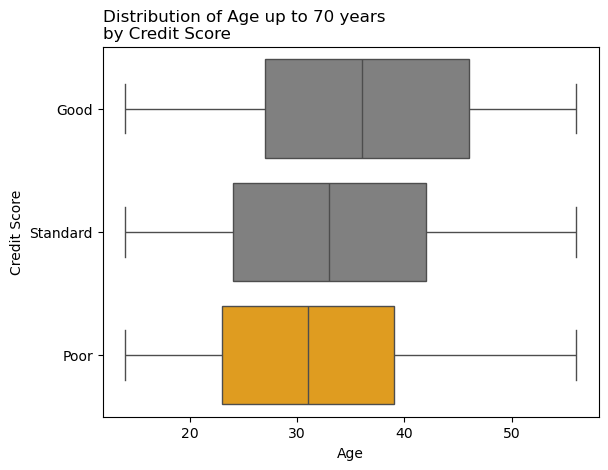

In [13]:
sns.boxplot(
    data=df_clean[df_clean["Age"]<=70],
    x="Age",
    y="Credit_Score",
    hue="Credit_Score",
    palette=["gray", "gray", "orange"]
)

plt.title("Distribution of Age up to 70 years\nby Credit Score", loc="left")
plt.ylabel("Credit Score")
plt.show()

In [14]:
print(
    "Phik correlation score of age and credit score: ", 
    df_clean.loc[df_clean["Age"]<=70, ["Credit_Score", "Age"]].phik_matrix()["Credit_Score"]["Age"].round(2)
)     

interval columns not set, guessing: ['Age']
Phik correlation score of age and credit score:  0.23


- Boxplot shown that the median age of customers with poor credit scores are the lowest.
- But, the phik correlation shown that age and credit score have weak correlation.
- These findings indicate that the age distribution by credit scores is just a coincidence. In other words, younger customers won't automatically have bad credit scores.

# Conclusion

- Customers with poor credit score have slightly higher number of credit card on average.
- Montly Balance and Annual Income don't affect Credit Score
- Outstanding Debt, Delay from Due Date, and Credit Card Age are top 3 variables with a high correlation to Credit Score.
- There are 29% customers with poor credit score
- There's no association between Customer's age and credit score